In [1]:
from Starts.startvis import *
from Starts.startmod import *
%matplotlib inline
train_data.head()

local_kwargs {'nan_drop_row': False, 'drop_obj_col': False, 'nan_drop_col': False, 'data_path_1': '2_Titanic/data/train.csv', 'data_path_3': '2_Titanic/data/test.csv', 'data_path_2': '2_Titanic/data/titanic_no_nan.csv', 'nan_mean': True, 'nan_zero': False, 'nan_mean_neighbors': False}


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


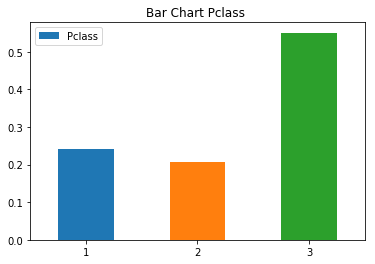

In [2]:
StartVis.vis_bar(train_data, ['Pclass'])

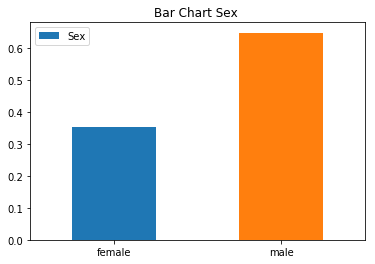

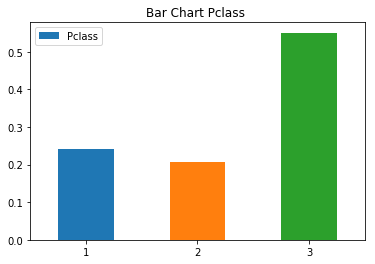

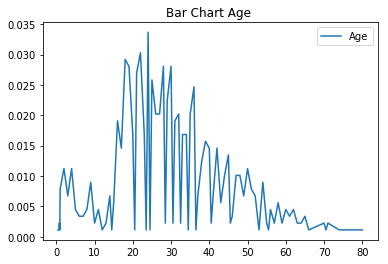

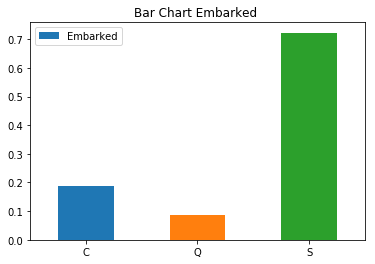

In [3]:
StartVis.vis_bar(train_data, ['Sex', 'Pclass', 'Age', 'Embarked'])

In [4]:
# reviews[reviews['price'] < 200]['price'].plot.hist()
func_filter = train_data['Age']>20  # and train_data['Sex']=='female'
StartML.idx_columns(train_data)

[('PassengerId', 0, dtype('int64')),
 ('Survived', 1, dtype('int64')),
 ('Pclass', 2, dtype('int64')),
 ('Name', 3, dtype('O')),
 ('Sex', 4, dtype('O')),
 ('Age', 5, dtype('float64')),
 ('SibSp', 6, dtype('int64')),
 ('Parch', 7, dtype('int64')),
 ('Ticket', 8, dtype('O')),
 ('Fare', 9, dtype('float64')),
 ('Cabin', 10, dtype('O')),
 ('Embarked', 11, dtype('O'))]

In [5]:
StartVis.vis_hist(train_data, ['Sex'])

No numeric data to plot


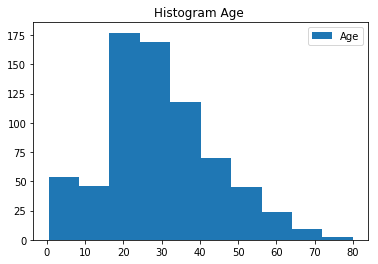

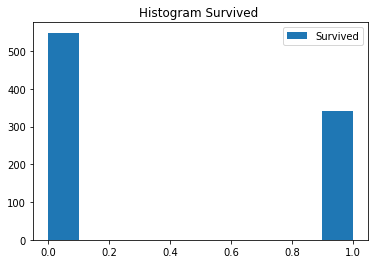

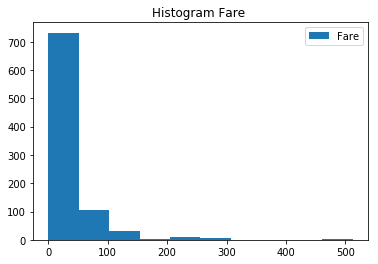

In [6]:
StartVis.vis_hist(train_data, ['Age', 'Survived', 'Fare'])

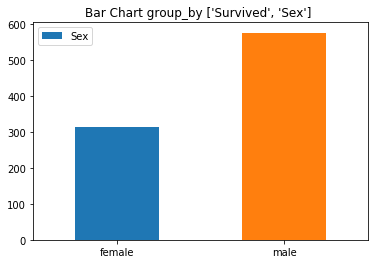

In [7]:
StartVis.vis_bar_groupby(train_data, ['Survived', 'Sex'], 'Sex')

In [8]:
func_filter = pd.Series([train_data['Sex']=='female', train_data['Age']>20])
type(func_filter)

pandas.core.series.Series

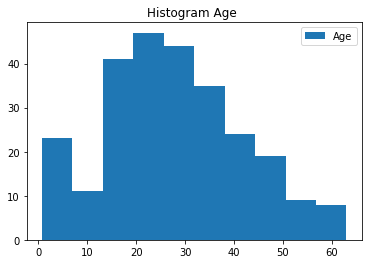

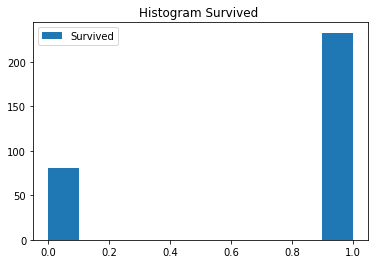

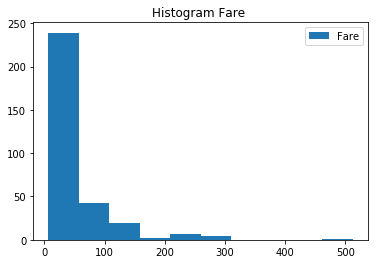

No numeric data to plot


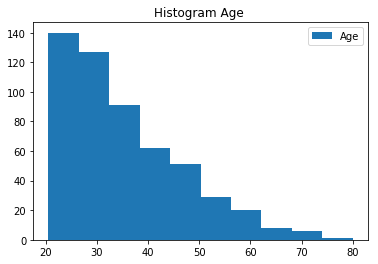

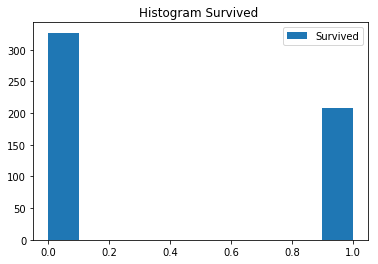

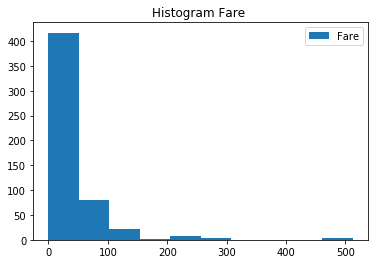

No numeric data to plot


In [9]:
for f in func_filter:
    StartVis.vis_hist(train_data, ['Age', 'Survived', 'Fare', 'Sex'], func_filter=f)

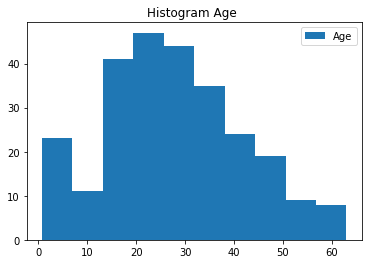

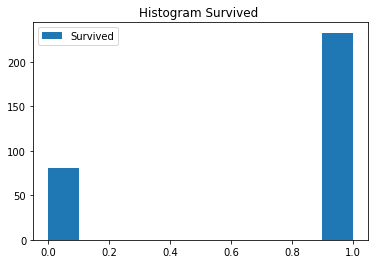

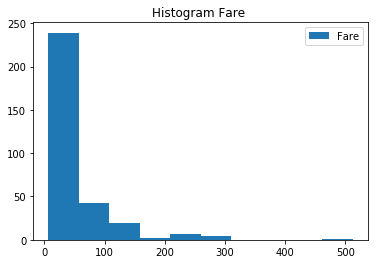

No numeric data to plot


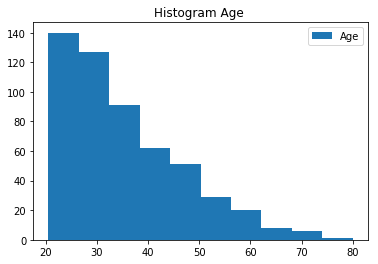

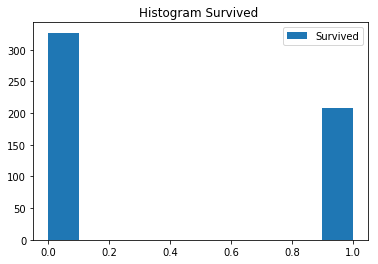

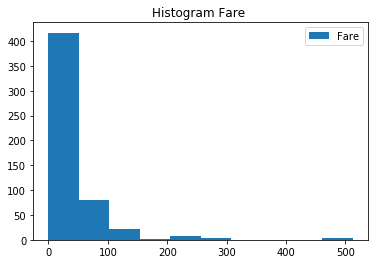

No numeric data to plot


In [10]:
for f in func_filter:
    StartVis.vis_hist(train_data, ['Age', 'Survived', 'Fare', 'Sex'], func_filter=f)

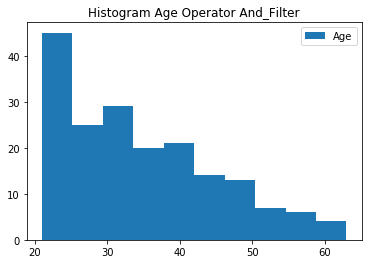

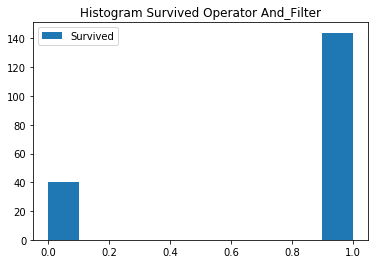

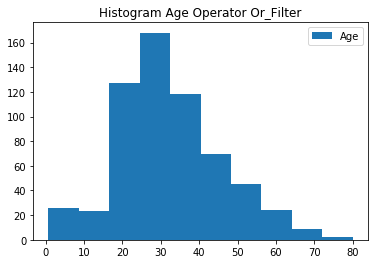

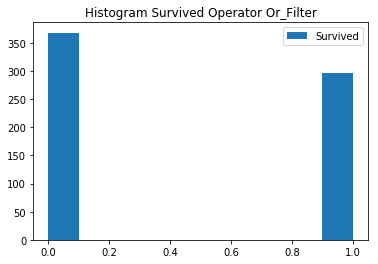

In [11]:
filter1 = train_data['Sex']=='female'
filter2 = train_data['Age']>20

filter3 = filter1 & filter2   # and

StartVis.vis_hist(train_data, ['Age', 'Survived'], func_filter=filter3, title='Operator And_Filter')

filter4 = filter1 | filter2   # or
# train_data[filter4]['Age'].plot.hist()
StartVis.vis_hist(train_data, ['Age', 'Survived'], func_filter=filter4, title='Operator Or_Filter')

In [12]:
attributes=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Dr', 'Ms', 'Capt']
train_data = StartMod.feature_engineering(train_data, old_feature='Name', new_feature='Title', new_attributes=attributes, 
                                          rm=True)

In [13]:
func = lambda col: train_data.drop(col, axis=1)
train_data = func(['Ticket', 'Cabin', 'Embarked'])

train_data = StartMod.process_nan_simply(train_data, nan_column='Title')
train_data = StartMod.process_nan_columns(train_data)

In [14]:
StartMod.nan_columns(train_data)

[]

In [15]:
train_data = StartMod.encode_label_column(train_data, label_columns=['Title', 'Sex'], one_hot=False)

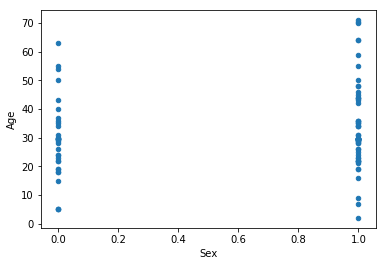

In [16]:
# get 100 points
train_data.sample(100).plot.scatter(x='Sex', y='Age')

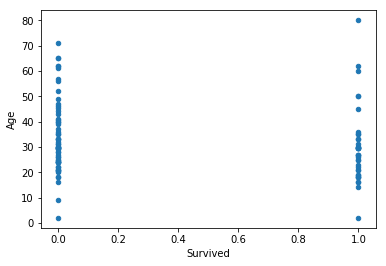

In [17]:
# Scatter plot
train_data[filter4].sample(100).plot.scatter(x='Survived', y='Age')

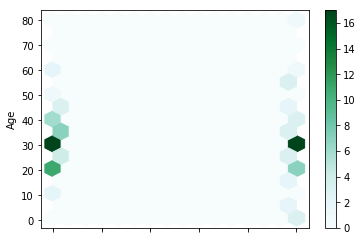

In [18]:
# Hexplot
train_data[filter4].sample(100).plot.hexbin(x='Survived', y='Age', gridsize=15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
693,694,0,3,1,25.000000,0,0,7.2250,5
852,853,0,3,0,9.000000,1,1,15.2458,4
632,633,1,1,1,32.000000,0,0,30.5000,1
534,535,0,3,0,30.000000,0,0,8.6625,4
765,766,1,1,0,51.000000,1,0,77.9583,6
107,108,1,3,1,29.699118,0,0,7.7750,5
296,297,0,3,1,23.500000,0,0,7.2292,5
624,625,0,3,1,21.000000,0,0,16.1000,5
88,89,1,1,0,23.000000,3,2,263.0000,4
862,863,1,1,0,48.000000,0,0,25.9292,6


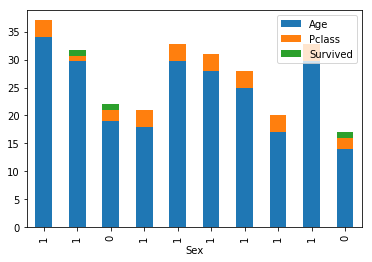

In [19]:
# Stacked plots only appropriate for data within the same groups (e.g. many different types of wines in group wine)
train_data[['Sex', 'Age', 'Pclass', 'Survived']].sample(10).plot.bar(stacked=True, x='Sex')

# get 10 random points
train_data.sample(10)

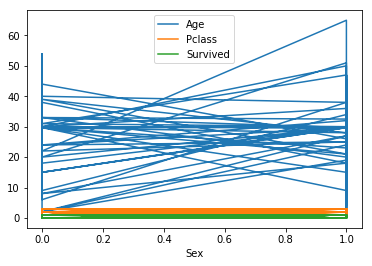

In [20]:
# Use line to cover many points greater than window size
train_data[['Sex', 'Age', 'Pclass', 'Survived']].sample(100).plot.line(x='Sex')